# CMSC320 Final Tutorial
By Esra Mahgoub

## Introduction

The COVID-19 disease is a coronavirus that was discovered in late 2019 and was declared a global health emergency by the CDC in January 2020. Coronaviruses are a large group of viruses that can cause severe respiratory infections and many other illnesses. Symptoms range from coughing and fever to difficulty breathing and loss of smell and taste. Initially discovered in Wuhan, China, COVID-19 cases began to drastically increase and spread across regions and continents. In March 2020, many countries, including the U.S. were on lockdown and governments have declared states-of-emergency and stay-at-home orders to slow down the transmission of the virus. The World Health Organization and CDC recommended mask mandates, social distancing and other health guidelines to prevent individuals from contracting the disease. Over the course of almost two years since the first discovery, there is a cumulative total of 271 million COVID-19 cases, and more than 5.31 million deaths worldwide.

In December 2020, prototypes of COVID-19 vaccinations were authorized for emergency use by the FDA. The Pfizer-BioNTech and Moderna COVID-19 Vaccines were administered to first-responders and essential medical personnel. In the beginning of 2021, the FDA issued emergency authorization of the Janssen version as more individuals became eligible to receive the vaccine. 

In this tutorial, we aim to tidy the State of Maryland COVID-19 data retrieved from Data.gov and analyze the effects of vaccinations by calculating the growth rate of cases over time. We will analyze the trends in COVID cases each month from March 2020 to December 2021 and go in-depth to see which counties in Maryland had the biggest outbreak. We will compare the rate of positive cases before and after vaccines were administered to see if there is a significant impact. The growth rate of hospitalizations and deaths across the state will also be analyzed and will serve as additional evidence to determine if vaccinations have reduced the amount of COVID-19 cases in Maryland.


This tutorial will walk you through the data science pipeline using COVID-19 data on the state of Maryland. We will analyze trends in positive cases and vaccinations per county, and determine its relationship with hospitalizations and deaths across the state. We will also take a closer look at influential dates such as Christmas and New Years, to see if there was a spike in positive cases and how the vaccinations influenced the results. 




Brief introduction about COVID-19
Dates 3/2020-12/2021
Vaccinations begain 12/2020

Analyze trends in cases and vaccinations per county

Analyze cases and hospitalizations and deaths as a state
-> we can combine all of the vaccinations per month and use it as a state result

linear regression for hospitalizations and vaccinations to compare
look at trends in the 2020 holiday season Thanksgiving vs Christmas which is before and after covid vaccines

hypothesis testing
state cases increase in thanksgiving vs Christmas and vaccination rates for both
compare the counties with the highest cases and the highest vaccinations, are they the same counties or different?

## Tools Used
The tools used in this notebook are
- Pandas
- Numpy
- Mathplotlib
- Datetime

## Data Collection

### Importing Tools
I used the following tools to aid in the data processing and visualization portions of the tutorial

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import datetime
from matplotlib import pyplot, dates, figure
from datetime import datetime

### Data Scraping
To determine the trend of COVID-19 in the state of Maryland, we will be looking at multiple data sets from March 2020 to December 2021. We will look at the number of positive cases for each county, vaccinations per county, hospitalizations as a state and number of deaths as a state. This data has been provided in the form of a CSV, so we will need to scrape the data using pandas and store them in a visual dataframe to make it easier to analyze.

In [229]:
# The cumulative number of positive COVID-19 cases categorized by Maryland county over time.

cases = pd.read_csv('MD_COVID-19_-_Cases_by_County.csv')
cases = cases.fillna(0) # need to fill NaN cells with 0 to show that 0 new cases were discovered that day
cases.head()

,OBJECTID,DATE,Allegany,Anne_Arundel,Baltimore,Baltimore_City,Calvert,Caroline,Carroll,Cecil,...,Montgomery,Prince_Georges,Queen_Annes,Somerset,St_Marys,Talbot,Washington,Wicomico,Worcester,Unknown
0,1,03/15/2020 10:00:00 AM,0.0,2,3,1,0.0,0.0,1,0.0,...,12,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,03/16/2020 10:00:00 AM,0.0,1,4,1,0.0,0.0,1,0.0,...,10,15,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,03/17/2020 10:00:00 AM,0.0,3,6,1,0.0,0.0,1,0.0,...,24,14,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,03/18/2020 10:00:00 AM,0.0,4,10,4,0.0,0.0,1,0.0,...,31,20,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,03/19/2020 10:00:00 AM,0.0,5,12,8,1.0,0.0,2,0.0,...,33,23,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In the cases dataframe above, we can see that each column is a separate Maryland county and the cells show the cumulative number of positive cases every day. There are over 630 days/rows in this dataset which is too much to plot individually, so we will tidy the data in the next section.

In [230]:
# The cumulative number of COVID-related hospitalizations in the entire state over time.

hosp = pd.read_csv('MD_COVID-19_-_Total_Hospitalizations.csv')
hosp.head()

,OBJECTID,DATE,Count
0,1,03/13/2020 10:00:00 AM,2.0
1,2,03/14/2020 10:00:00 AM,3.0
2,3,03/15/2020 10:00:00 AM,NaN
3,4,03/16/2020 10:00:00 AM,4.0
4,5,03/17/2020 10:00:00 AM,NaN


In the hospitalizations dataset above, it shows the total number of hospitalizations in Maryland on a day-by-day basis. The cases and hospitalizations datasets follow the same timeframe so we will also tidy this data so we can see general trends per month.

In [231]:
# The cumulative number of COVID-19 vaccinations categorized by Maryland County over time. 
# The vaccines were first administered in December 2020.

vacc = pd.read_csv('MD_COVID-19_-_Vaccinations_by_County.csv')
vacc.head()

,VACCINATION_DATE,County,FirstDoseDaily,FirstDoseCumulative,SecondDoseDaily,SecondDoseCumulative,SingleDoseDaily,SingleDoseCumulative,AtLeastOneDose,AtLeastOneDoseCumulative,FullyVaccinated,FullyVaccinatedCumulative
0,12/14/2020 10:00:00 AM,Anne Arundel,2.0,2,NaN,0,NaN,0,NaN,2,NaN,0
1,12/15/2020 10:00:00 AM,Anne Arundel,4.0,6,NaN,0,NaN,0,NaN,6,NaN,0
2,12/16/2020 10:00:00 AM,Anne Arundel,56.0,62,NaN,0,NaN,0,NaN,62,NaN,0
3,12/17/2020 10:00:00 AM,Anne Arundel,106.0,168,NaN,0,NaN,0,NaN,168,NaN,0
4,12/18/2020 10:00:00 AM,Anne Arundel,180.0,348,1.0,1,NaN,0,NaN,348,NaN,1


In the vaccinations dataframe above, we can see that each column represents a different vaccination dose along with its cumulative amount. Pfizer and Moderna have 2 doses per individual and Janssen has a single dose. We are interested in analyzing the number of fully vaccinated individuals so we can get a more accurate representation. Each row is also categorized by county so we can see how many fully vaccinated individuals there are in a specific county which will be useful when comparing to the other datasets such as the number of cases per county. This dataset is extremely large with over 9000 rows total. There are 24 counties, and each county has a year's worth of vaccination data. We will need to process this data further so provide more accurate analyzations. 

In [232]:
deaths = pd.read_csv('MD_COVID-19_-_Total_Confirmed_Deaths_Statewide.csv')
deaths.head()

,OBJECTID,DATE,Count
0,1,03/18/2020 10:00:00 AM,1
1,2,03/19/2020 10:00:00 AM,1
2,3,03/20/2020 10:00:00 AM,2
3,4,03/21/2020 10:00:00 AM,2
4,5,03/22/2020 10:00:00 AM,3


Similar to hospitalizations, it shows the total number of deaths in Maryland on a day-by-day basis. We can later create a difference column to see how many deaths occurred in a single day/month.

## Data Processing

### Tidying Data
The first step to tidy the datasets is to remove unwanted columns. The ObjectID column acts similarly to the DataFrame index, so that can easily be removed. For the vaccinations dataset, we will only focus on the Fully Vaccinated columns because there are multiple vaccines that offer 1 or 2 doses so we want to prevent any duplicate or missing data from happening. 

We will only be analyzing the number of COVID-19 cases, number of hospitalizations, number of vaccinations and number of deaths in the state of Maryland. In the date column, I converted each of the cells into a datetime object and extracted the month and year for simplicity and ease in reading the data. Processing this data will better help us determine trends and patterns between the sets. 

I also put all of the Maryland counties into a list so we can easily iterate over the datasets and quickly extract data that applies to a specific county.

In [233]:
counties = ['Allegany', 'Anne_Arundel', 'Baltimore', 'Baltimore_City', 'Calvert', 'Caroline', 'Carroll', 'Cecil', 'Charles', 'Dorchester', 'Frederick', 'Garrett', 'Harford', 'Howard', 'Kent', 'Montgomery', 'Prince_Georges', 'Queen_Annes', 'Somerset', 'St_Marys', 'Talbot', 'Washington', 'Wicomico', 'Worcester']

In [234]:
# Remove unwanted columns to clean up data
cases = cases.drop(columns=['OBJECTID'])
hosp = hosp.drop(columns=['OBJECTID'])
deaths = deaths.drop(columns=['OBJECTID'])
vacc = vacc.drop(columns=['FirstDoseDaily', 'FirstDoseCumulative', 'SecondDoseDaily', 'SecondDoseCumulative', 'SingleDoseDaily', 'SingleDoseCumulative', 'AtLeastOneDose', 'AtLeastOneDoseCumulative'])

### Summarizing Data
We will now begin tidying and processing the data. Each dataset is recording data daily from March 15, 2020 to December 4, 2021. That is over 600 rows per dataset for over 18 months. It will be extremely crowded if we try to plot the daily points on a graph, so instead we will obtained a summary for each month. The datasets gather cumulative data so we will extract the row that corresponds to the last day of each month to obtain a more accurate representation of COVID related growth. We can also calculate the difference between each month to how many cases/hospitalizations/deaths/vaccinations occured during the month. This makes the structure of our data more uniform and easier to visualize later on.

#### 1. Number of COVID-19 cases

In [235]:
# Tidying the cases dataset

# Only get summarized data for each month for cases  
c1 = cases.loc[cases['DATE'].astype(str).str.contains('30')].copy()
c2 = cases.loc[cases['DATE'].astype(str).str.contains('12/04/2021')].copy()
c3 = cases.loc[cases['DATE'].astype(str).str.contains('02/28')].copy()
cs = c1.append(c2)
row = cs.append(c3)

# Sort DataFrame by date
cs['DATE'] = pd.to_datetime(cs['DATE'], format='%m/%d/%Y %H:%M:%S AM')
cs.sort_values(by='DATE', inplace=True)

# Change date format to mm-yyyy
cs['year'] = pd.DatetimeIndex(cs['DATE']).year.astype(str)
cs['month'] = pd.DatetimeIndex(cs['DATE']).month.astype(str)
cs['DATE'] = cs[['month', 'year']].agg('-'.join, axis=1).astype(str)

# Drop unneeded columns
cs = cs.set_index('DATE')
cs = cs.drop(columns=['Unknown', 'year', 'month'])
cs

,Allegany,Anne_Arundel,Baltimore,Baltimore_City,Calvert,Caroline,Carroll,Cecil,Charles,Dorchester,...,Kent,Montgomery,Prince_Georges,Queen_Annes,Somerset,St_Marys,Talbot,Washington,Wicomico,Worcester
DATE,,,,,,,,,,,,,,,,,,,,,
3-2020,0.0,110,186,152,12.0,4.0,82,13.0,33,0.0,...,3.0,341,294,4.0,1.0,9.0,4.0,7.0,6.0,3.0
4-2020,118.0,1725,2831,2068,150.0,71.0,436,167.0,564,51.0,...,79.0,4300,6043,52.0,26.0,150.0,35.0,206.0,406.0,61.0
5-2020,177.0,3743,5955,5564,334.0,253.0,880,366.0,1085,141.0,...,170.0,11251,15022,159.0,73.0,471.0,96.0,456.0,943.0,210.0
6-2020,205.0,5109,7985,7546,414.0,319.0,1117,479.0,1393,188.0,...,198.0,14737,18572,230.0,87.0,637.0,137.0,698.0,1067.0,286.0
7-2020,264.0,6684,11615,11004,565.0,418.0,1435,619.0,1819,326.0,...,229.0,17397,22183,378.0,117.0,874.0,330.0,936.0,1269.0,518.0
8-2020,391.0,8300,15382,14424,786.0,504.0,1686,782.0,2382,458.0,...,263.0,19946,26151,543.0,192.0,1108.0,472.0,1308.0,1547.0,800.0
9-2020,474.0,10117,17994,15629,972.0,657.0,1965,1085.0,2798,594.0,...,305.0,22584,29494,666.0,277.0,1310.0,568.0,1827.0,2009.0,1058.0
10-2020,735.0,12115,20867,17850,1195.0,753.0,2278,1365.0,3208,808.0,...,343.0,25831,32937,798.0,435.0,1501.0,655.0,2327.0,2539.0,1222.0
11-2020,3168.0,16742,29315,24521,1598.0,972.0,3327,2109.0,4391,1011.0,...,448.0,33400,41297,1097.0,918.0,2153.0,819.0,4281.0,3440.0,1483.0


The cs dataset above shows the cumulative number of positive cases each month for each county in Maryland. We can break this down even further by determining how many new cases emerged per month instead of the total count. We will use both datasets later on for visualization and processing.

In [236]:
# We want to get the number of new cases each month instead of just the cumulative count

case_diff = pd.DataFrame()
for x in counties:
    case_diff[x] = cs[x].diff()
    case_diff[x][0] = cs[x][0]
case_diff

,Allegany,Anne_Arundel,Baltimore,Baltimore_City,Calvert,Caroline,Carroll,Cecil,Charles,Dorchester,...,Kent,Montgomery,Prince_Georges,Queen_Annes,Somerset,St_Marys,Talbot,Washington,Wicomico,Worcester
DATE,,,,,,,,,,,,,,,,,,,,,
3-2020,0.0,110.0,186.0,152.0,12.0,4.0,82.0,13.0,33.0,0.0,...,3.0,341.0,294.0,4.0,1.0,9.0,4.0,7.0,6.0,3.0
4-2020,118.0,1615.0,2645.0,1916.0,138.0,67.0,354.0,154.0,531.0,51.0,...,76.0,3959.0,5749.0,48.0,25.0,141.0,31.0,199.0,400.0,58.0
5-2020,59.0,2018.0,3124.0,3496.0,184.0,182.0,444.0,199.0,521.0,90.0,...,91.0,6951.0,8979.0,107.0,47.0,321.0,61.0,250.0,537.0,149.0
6-2020,28.0,1366.0,2030.0,1982.0,80.0,66.0,237.0,113.0,308.0,47.0,...,28.0,3486.0,3550.0,71.0,14.0,166.0,41.0,242.0,124.0,76.0
7-2020,59.0,1575.0,3630.0,3458.0,151.0,99.0,318.0,140.0,426.0,138.0,...,31.0,2660.0,3611.0,148.0,30.0,237.0,193.0,238.0,202.0,232.0
8-2020,127.0,1616.0,3767.0,3420.0,221.0,86.0,251.0,163.0,563.0,132.0,...,34.0,2549.0,3968.0,165.0,75.0,234.0,142.0,372.0,278.0,282.0
9-2020,83.0,1817.0,2612.0,1205.0,186.0,153.0,279.0,303.0,416.0,136.0,...,42.0,2638.0,3343.0,123.0,85.0,202.0,96.0,519.0,462.0,258.0
10-2020,261.0,1998.0,2873.0,2221.0,223.0,96.0,313.0,280.0,410.0,214.0,...,38.0,3247.0,3443.0,132.0,158.0,191.0,87.0,500.0,530.0,164.0
11-2020,2433.0,4627.0,8448.0,6671.0,403.0,219.0,1049.0,744.0,1183.0,203.0,...,105.0,7569.0,8360.0,299.0,483.0,652.0,164.0,1954.0,901.0,261.0


#### 2. Number of Hospitalizations

In [237]:
# Only get summarized data for each month for hospitalizations in the state of Maryland
h1 = hosp.loc[hosp['DATE'].astype(str).str.contains('30')].copy()
h2 = hosp.loc[hosp['DATE'].astype(str).str.contains('12/04/2021')].copy()
h3 = hosp.loc[hosp['DATE'].astype(str).str.contains('02/28')].copy()
hsp = h1.append(h2)
hsp = hsp.append(h3)

# Sort DataFrame by date
hsp['DATE'] = pd.to_datetime(hsp['DATE'], format='%m/%d/%Y %H:%M:%S AM')
hsp.sort_values(by='DATE', inplace=True)

# # Change date format to mm-yyyy
hsp['year'] = pd.DatetimeIndex(hsp['DATE']).year.astype(str)
hsp['month'] = pd.DatetimeIndex(hsp['DATE']).month.astype(str)
hsp['DATE'] = hsp[['month', 'year']].agg('-'.join, axis=1).astype(str)

# Drop unneeded columns
hsp = hsp.set_index('DATE')
hsp = hsp.drop(columns=['year', 'month'])
hsp

,Count
DATE,
3-2020,353.0
4-2020,4559.0
5-2020,8619.0
6-2020,10844.0
7-2020,12500.0
8-2020,14255.0
9-2020,15530.0
10-2020,17023.0
11-2020,21051.0


Similar to the cases dataset, we will calculate the difference between each row to show how many new hospitalizations were added each month

In [238]:
# calculate the number of new hospitalizations for each month

hsp["New Cases"] = hsp.diff()
hsp.columns = ["Cumulative Count", "New Hospitalizations"]
hsp

,Cumulative Count,New Hospitalizations
DATE,,
3-2020,353.0,NaN
4-2020,4559.0,4206.0
5-2020,8619.0,4060.0
6-2020,10844.0,2225.0
7-2020,12500.0,1656.0
8-2020,14255.0,1755.0
9-2020,15530.0,1275.0
10-2020,17023.0,1493.0
11-2020,21051.0,4028.0


#### 3. Number of Vaccinations
The vaccinations dataset is formatted slightly different than the previous sets. We first need to organize the data by obtaining a summary per month, however since the counties are not separated by columns, we need to loop through the rows and extract the last day per month since that row contains the cumulative data. We will need to pivot this dataframe later to get better visualizations of the vaccination rates. 

In [239]:
cnts = ['Allegany', 'Anne Arundel', 'Baltimore', 'Baltimore City', 'Calvert', 'Caroline', 'Carroll', 'Cecil', 'Charles', 'Dorchester', 'Frederick', 'Garrett', 'Harford', 'Howard', 'Kent', 'Montgomery', 'Prince George\'s', 'Queen Anne\'s', 'Somerset', 'St. Mary\'s', 'Talbot', 'Washington', 'Wicomico', 'Worcester']

# Create a new dataframe to store tidied data
res = pd.DataFrame()

# For each county, we will gather all rows in the dataframe and extract the summarized results. 
for x in cnts:
    df = vacc[vacc['County'] == x]
    
    # Only get summarized data for each month for each county  
    d1 = df.loc[df['VACCINATION_DATE'].astype(str).str.contains('30')].copy()
    d2 = df.loc[df['VACCINATION_DATE'].astype(str).str.contains('12/04/2021')].copy()
    d3 = df.loc[df['VACCINATION_DATE'].astype(str).str.contains('02/28')].copy()
    
    vc = d1.append(d2)
    vc = vc.append(d3)
    
    
    # Sort DataFrame by date
    vc['VACCINATION_DATE'] = pd.to_datetime(vc['VACCINATION_DATE'], format='%m/%d/%Y %H:%M:%S AM')
    vc.sort_values(by='VACCINATION_DATE', inplace=True)


    # Change date format to mm-yyyy
    vc['year'] = pd.DatetimeIndex(vc['VACCINATION_DATE']).year.astype(str)
    vc['month'] = pd.DatetimeIndex(vc['VACCINATION_DATE']).month.astype(str)
    vc['VACCINATION_DATE'] = vc[['month', 'year']].agg('-'.join, axis=1).astype(str)

    # Drop unneeded columns
#    vc = vc.set_index('VACCINATION_DATE')
    vc = vc.drop(columns=['year', 'month'])
    
    res = res.append(vc)
    res = res.fillna(0)

res

,VACCINATION_DATE,County,FullyVaccinated,FullyVaccinatedCumulative
398,12-2020,Allegany,0.0,1
484,1-2021,Allegany,0.0,1249
569,2-2021,Allegany,0.0,8068
655,3-2021,Allegany,136.0,11773
686,4-2021,Allegany,769.0,21640
...,...,...,...,...
9115,8-2021,Worcester,66.0,30172
9146,9-2021,Worcester,41.0,31582
9176,10-2021,Worcester,0.0,32291
9207,11-2021,Worcester,26.0,32904


#### 4. Number of Deaths

In [240]:
# Only get summarized data for each month for deaths in the state of Maryland
d1 = deaths.loc[deaths['DATE'].astype(str).str.contains('30')].copy()
d2 = deaths.loc[deaths['DATE'].astype(str).str.contains('12/04/2021')].copy()
d3 = deaths.loc[deaths['DATE'].astype(str).str.contains('02/28')].copy()

dts = d1.append(d2)
dts = dts.append(d3)

# Sort DataFrame by date
dts['DATE'] = pd.to_datetime(dts['DATE'], format='%m/%d/%Y %H:%M:%S AM')
dts.sort_values(by='DATE', inplace=True)

# Change date format to mm-yyyy
dts['year'] = pd.DatetimeIndex(dts['DATE']).year.astype(str)
dts['month'] = pd.DatetimeIndex(dts['DATE']).month.astype(str)
dts['DATE'] = dts[['month', 'year']].agg('-'.join, axis=1).astype(str)

# Drop unneeded columns
dts = dts.set_index('DATE')
dts = dts.drop(columns=['year', 'month'])

dts["New Deaths"] = dts.diff()
dts.columns = ["Cumulative Count", "New Deaths this Month"]
dts.fillna(15)

,Cumulative Count,New Deaths this Month
DATE,,
3-2020,15,15.0
4-2020,1047,1032.0
5-2020,2390,1343.0
6-2020,3062,672.0
7-2020,3357,295.0
8-2020,3609,252.0
9-2020,3805,196.0
10-2020,3990,185.0
11-2020,4486,496.0


## Exploratory Analysis and Data Visualization

### Overall Data
First we will graph the overall trends of cases, hospitalizations and vaccinations per month so we can get a better understanding of the datasets.

#### 1. COVID Cases by County

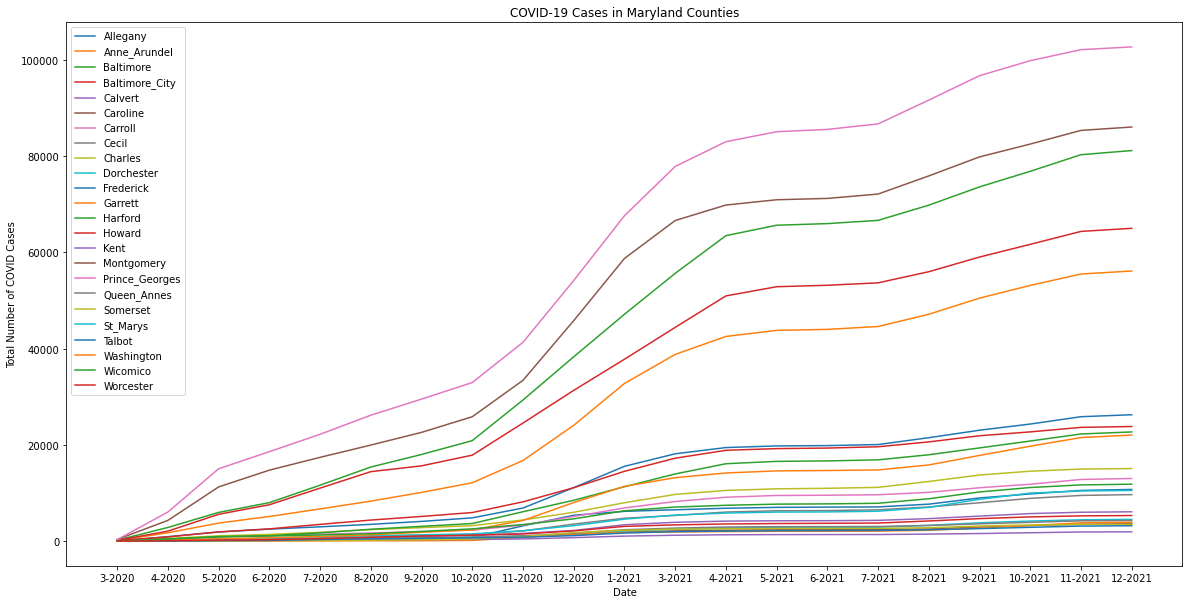

In [247]:
plt.figure(figsize=(20,10))

for x in counties:
    plt.plot(cs.index, cs[x], label=x)
    plt.title("COVID-19 Cases in Maryland Counties")
    plt.xlabel("Date")
    plt.ylabel("Total Number of COVID Cases")
plt.legend()


# WE NEED A LOT OF PROSE HERE
we will focus on PG, Montegomery, Baltimore, Baltimore City, Anne Arundel in the hypothesis test

#### 2. Vaccinations by County

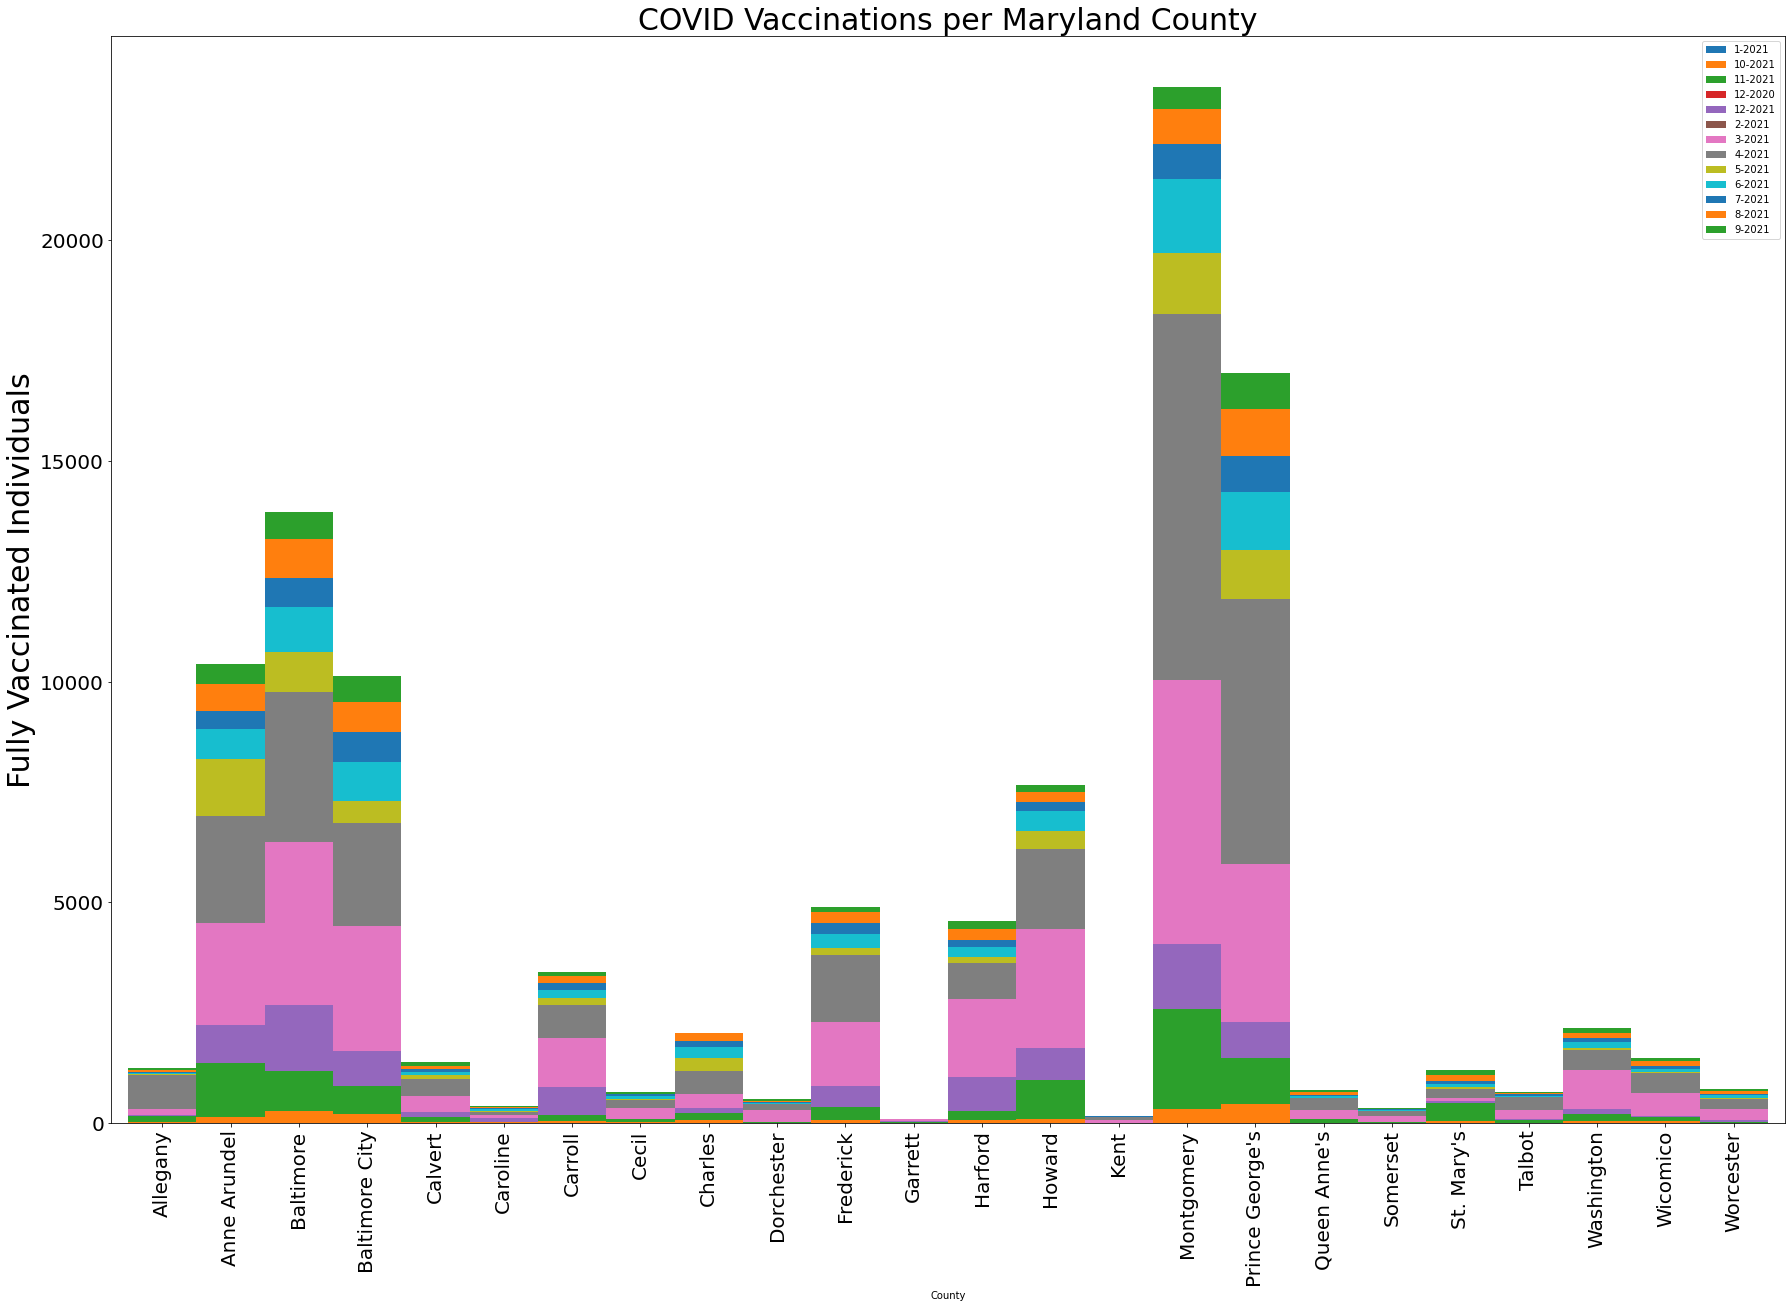

In [242]:
# Compare each counties fully vaccination count per month
plot = res.pivot(index = 'County', columns = 'VACCINATION_DATE', values='FullyVaccinated')
plot.plot.bar(stacked = True, figsize = (30, 20), fontsize = 20, width = 1 , ylabel = ("FullyVaccinated"), 
                  title = ('COVID Vaccinations per Maryland County'))

plt.ylabel("Fully Vaccinated Individuals", size = 30)
plt.title('COVID Vaccinations per Maryland County', size = 30)
plt.legend()

# WE NEED A LOT OF PROSE HERE 2

#### 2. Hospitalizations across Maryland

Text(0, 0.5, 'Hospitalizations')

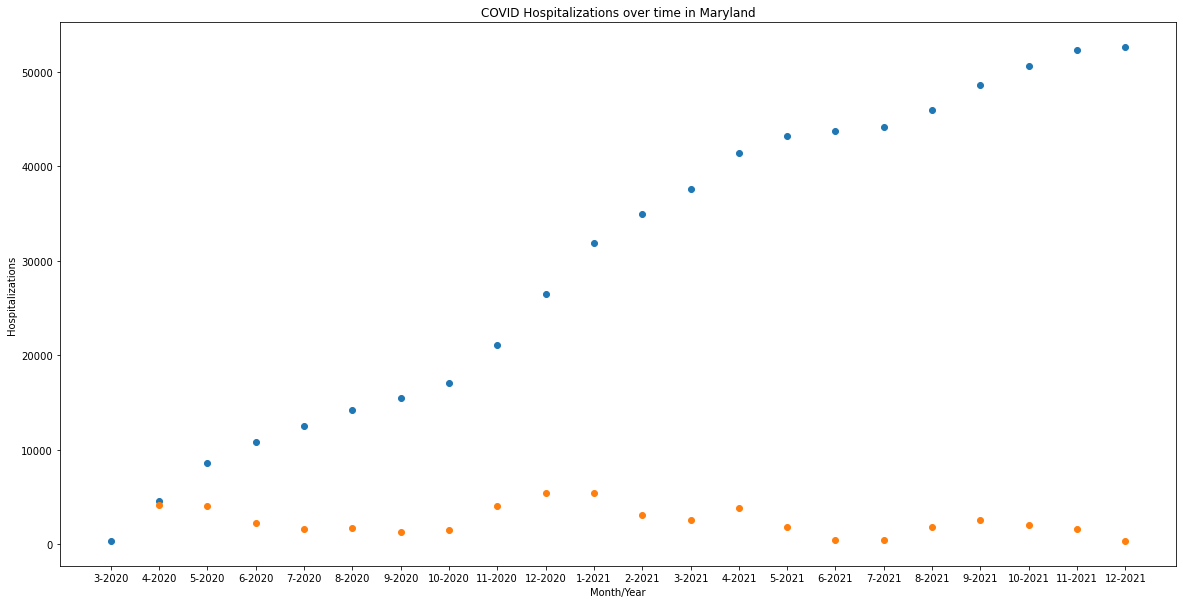

In [243]:
plt.figure(figsize=(20,10))
plt.scatter(hsp.index, hsp["Cumulative Count"])
plt.scatter(hsp.index, hsp["New Hospitalizations"])

plt.title("COVID Hospitalizations over time in Maryland")
plt.xlabel("Month/Year")
plt.ylabel("Hospitalizations")

# WE NEED A LOT OF PROSE HERE 3

Text(0, 0.5, 'Total Number of Deaths')

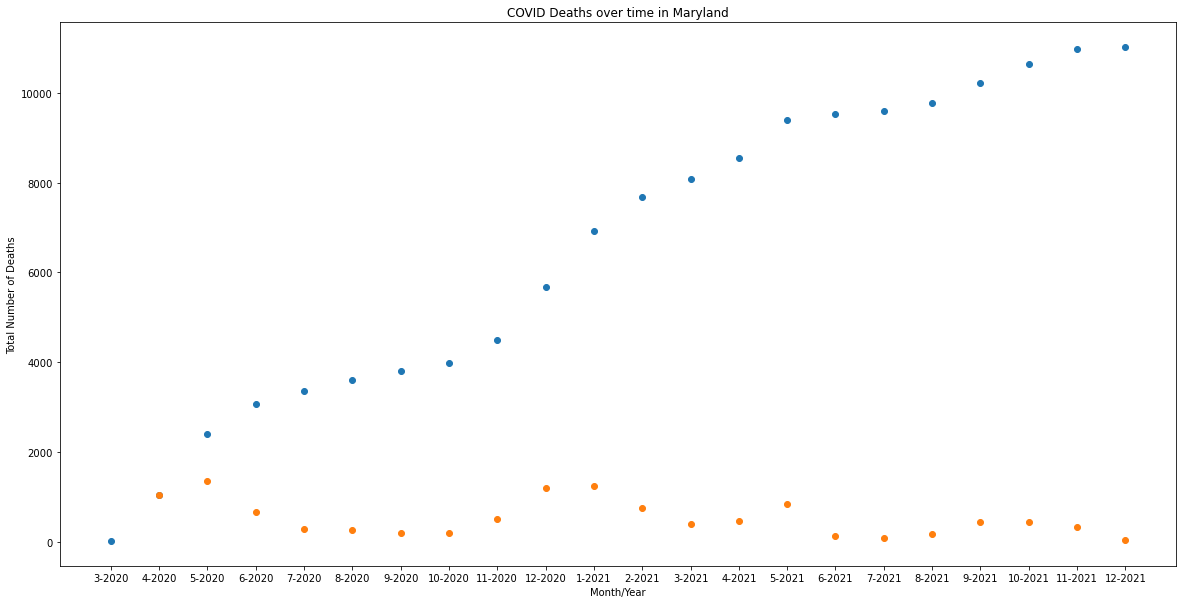

In [245]:
plt.figure(figsize=(20,10))
plt.scatter(dts.index, dts['Cumulative Count'])
plt.scatter(dts.index, dts["New Deaths this Month"])

plt.title("COVID Deaths over time in Maryland")
plt.xlabel("Month/Year")
plt.ylabel("Total Number of Deaths")

# WE NEED A LOT OF PROSE HERE 4
we can see that hospitalizations and deaths have a very similar shape, but the y-axis has a different scaling, hospitalizations goes up to 50,000 but deaths go up to 10,000

ideas

First get statistics for each dataset, mean, median, etc

linear regression for hospitalizations and deaths and vacc

a violin plot for each month and number of cases and vaccinations per county in each violin



Show the top 5 counties with the highest rates
we already showed cases, vaccines

Compare county cases to vaccinations after 12/14/2020

compare the counties with the highest cases and the highest vaccinations, are they the same counties or different?


I have monthly and cumulative cases by county
I have montly and cumulative vaccinations by county

I have monthly and cumulative hospitializations by state
I have monthly and cumulative deaths by state

Compare county cases to vaccinations after 12/14/2020
Compare state hospitalizations to deaths

## Analysis, Hypothesis Testing and Machine Learning:

hypothesis testing
look at trends in the 2020 holiday season Thanksgiving vs Christmas which is before and after covid vaccines

state cases increase in thanksgiving vs Christmas and vaccination rates for both
compare the counties with the highest cases and the highest vaccinations, are they the same counties or different?

use data to show trends
linear regression for cases and vaccs for top 5 during this period
linear regression for hospitalizations and deaths during this period

## Insight and Policy Decisions

explanation of data

how vaccinations helped reduce cases and hospitalizations and deaths

conclusion